,Unnamed: 0,bucket,cpu,gcl,population,time,gcl delta,gcl delta avg,cpu abnormal,cpu avg
count,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,3.550000e+02,1148.000000,1049.000000,66.000000,1050.000000
mean,574.000000,9628.597041,19.767023,14727.791246,11.515231,4.559112e+06,8.169861,8.189990,209.120228,20.092459
std,331.832036,367.164095,50.511580,2757.972831,0.860973,1.026239e+02,4.693006,1.801434,75.041294,3.029413
min,0.000000,8355.000000,3.444208,10443.834762,9.000000,4.558935e+06,0.000000,3.370000,51.884952,15.221094
25%,287.000000,9454.000000,4.755735,12219.834762,11.000000,4.559024e+06,4.000000,7.050000,201.632224,18.472549
50%,574.000000,9641.000000,5.365791,14515.834762,12.000000,4.559112e+06,8.000000,8.200000,245.043132,19.224549
75%,861.000000,9901.000000,10.181720,17157.834762,12.000000,4.559200e+06,12.000000,9.540000,256.523749,20.039382
max,1148.000000,11000.000000,274.498708,19822.834762,12.000000,4.559289e+06,17.000000,11.490000,274.498708,31.745070


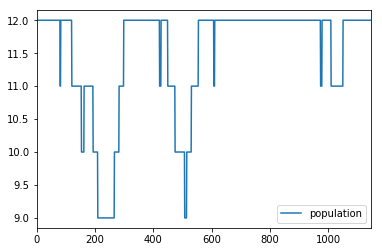

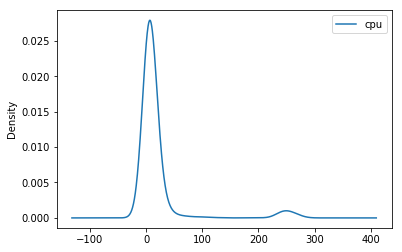

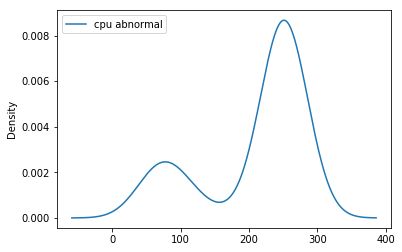

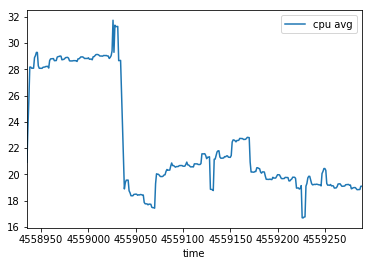

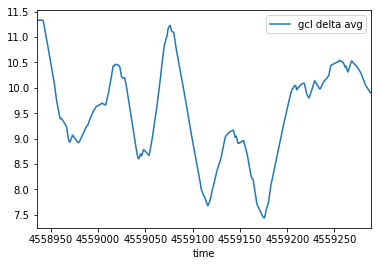

In [3]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

REFRESH_DATA = 0

if REFRESH_DATA:
    reports = fs.main()
    reports = [
        {
            **x,
            'gcl': x['gcl']['progress']
        }
        for x in reports
    ]
    df = pd.DataFrame(reports)
    df.to_csv("reports.csv")
else:
    df = pd.read_csv("reports.csv")
    
df['gcl delta'] = df['gcl'].diff().shift(-1)
df['gcl delta avg'] = df['gcl delta'].rolling(100).sum() / 100
df['cpu abnormal'] = df[df['cpu'] > 50]["cpu"]
df['cpu avg'] = df['cpu'].rolling(100).sum() / 100

df.plot(y="population")
df.plot.density(y="cpu")
df.plot.density(y="cpu abnormal")
df.plot(x="time", y="cpu avg")
df.plot(x="time", y="gcl delta avg")
df.describe()